<a href="https://colab.research.google.com/github/ranielli/analise-dados-covid-estatistica/blob/main/trabalho_IA_estatisca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Análise de Covid 19  - Município do Rio de Janeiro X Estado do RJ**
Autor: Rânielli Neves

* Preparação do Ambiente e criação dos **datasets**





In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
%matplotlib inline


data_20p1= pd.read_csv('dados/HIST_PAINEL_COVIDBR_2020_Parte1_14jul2021_new.csv', sep=';',low_memory=False)
data_20p2= pd.read_csv('dados/HIST_PAINEL_COVIDBR_2020_Parte2_14jul2021.csv', sep=';',low_memory=False)
data_21p1= pd.read_csv('dados/HIST_PAINEL_COVIDBR_2021_Parte1_14jul2021.csv', sep=';',low_memory=False)
data_21p2= pd.read_csv('dados/HIST_PAINEL_COVIDBR_2021_Parte2_14jul2021.csv', sep=';',low_memory=False)



* Unificação dos datasets 

In [2]:
data_geral = pd.concat([data_20p1, data_20p2, data_21p1,data_21p2])

In [3]:
data_geral.head()


,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0.0,0,0,NaN,NaN,NaN,NaN
Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1.0,0,0,NaN,NaN,NaN,NaN
Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0.0,0,0,NaN,NaN,NaN,NaN
Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0.0,0,0,NaN,NaN,NaN,NaN
Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1.0,0,0,NaN,NaN,NaN,NaN


##Análise do Município Rio de Janeiro
* Criando um dataframe Município Rio de Janeiro

In [4]:
geral_munic_rj = data_geral[data_geral.municipio =='Rio de Janeiro']
geral_munic_rj

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
502606,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2020-08-01,31.0,6718903.0,71792.0,470,8344,34.0,NaN,NaN,1.0
502607,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2020-08-02,32.0,6718903.0,71802.0,10,8358,14.0,NaN,NaN,1.0
502608,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2020-08-03,32.0,6718903.0,72079.0,277,8371,13.0,NaN,NaN,1.0
502609,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2020-08-04,32.0,6718903.0,72722.0,643,8419,48.0,NaN,NaN,1.0
502610,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2020-08-05,32.0,6718903.0,73396.0,674,8499,80.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45999,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-07-10,27.0,6718903.0,375242.0,1466,29175,133.0,NaN,NaN,1.0
46000,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-07-11,28.0,6718903.0,375616.0,374,29185,10.0,NaN,NaN,1.0
46001,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-07-12,28.0,6718903.0,375908.0,292,29192,7.0,NaN,NaN,1.0
46002,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-07-13,28.0,6718903.0,376763.0,855,29241,49.0,NaN,NaN,1.0


* Covertendo a coluna data para formato datetime

In [5]:
geral_munic_rj['data'] = pd.to_datetime(geral_munic_rj['data'])

* Estrutura do dataframe

In [6]:
geral_munic_rj.info()


<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 502606 to 46003
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   regiao                  348 non-null    object        
 1   estado                  348 non-null    object        
 2   municipio               348 non-null    object        
 3   coduf                   348 non-null    float64       
 4   codmun                  348 non-null    float64       
 5   codRegiaoSaude          348 non-null    object        
 6   nomeRegiaoSaude         348 non-null    object        
 7   data                    348 non-null    datetime64[ns]
 8   semanaEpi               348 non-null    float64       
 9   populacaoTCU2019        348 non-null    float64       
 10  casosAcumulado          348 non-null    float64       
 11  casosNovos              348 non-null    int64         
 12  obitosAcumulado         348 non-null    int64   

In [7]:
geral_munic_rj 

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
502606,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2020-08-01,31.0,6718903.0,71792.0,470,8344,34.0,NaN,NaN,1.0
502607,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2020-08-02,32.0,6718903.0,71802.0,10,8358,14.0,NaN,NaN,1.0
502608,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2020-08-03,32.0,6718903.0,72079.0,277,8371,13.0,NaN,NaN,1.0
502609,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2020-08-04,32.0,6718903.0,72722.0,643,8419,48.0,NaN,NaN,1.0
502610,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2020-08-05,32.0,6718903.0,73396.0,674,8499,80.0,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45999,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-07-10,27.0,6718903.0,375242.0,1466,29175,133.0,NaN,NaN,1.0
46000,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-07-11,28.0,6718903.0,375616.0,374,29185,10.0,NaN,NaN,1.0
46001,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-07-12,28.0,6718903.0,375908.0,292,29192,7.0,NaN,NaN,1.0
46002,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-07-13,28.0,6718903.0,376763.0,855,29241,49.0,NaN,NaN,1.0


### Métricas do município do Rio de Janeiro  **Junho 2021**

In [8]:
mun_rj_junho_2021 = geral_munic_rj[(geral_munic_rj['data'] >= '2021-06-01' ) & (geral_munic_rj['data'] <= '2021-06-30' )]
mun_rj_junho_2021

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
594737,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-06-01,22.0,6718903.0,326549.0,2004,26437,137.0,NaN,NaN,1.0
594738,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-06-02,22.0,6718903.0,329059.0,2510,26555,118.0,NaN,NaN,1.0
594739,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-06-03,22.0,6718903.0,330941.0,1882,26667,112.0,NaN,NaN,1.0
594740,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-06-04,22.0,6718903.0,331689.0,748,26689,22.0,NaN,NaN,1.0
594741,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-06-05,22.0,6718903.0,333467.0,1778,26765,76.0,NaN,NaN,1.0
594742,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-06-06,23.0,6718903.0,333949.0,482,26765,0.0,NaN,NaN,1.0
594743,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-06-07,23.0,6718903.0,334158.0,209,26765,0.0,NaN,NaN,1.0
594744,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-06-08,23.0,6718903.0,336235.0,2077,26933,168.0,NaN,NaN,1.0
594745,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-06-09,23.0,6718903.0,338716.0,2481,27036,103.0,NaN,NaN,1.0
594746,Sudeste,RJ,Rio de Janeiro,33.0,330455.0,33005.0,METROPOLITANA I,2021-06-10,23.0,6718903.0,340672.0,1956,27173,137.0,NaN,NaN,1.0


* <font color="ffd11b">**Média de Casos no Mês de Junho 2021**

In [9]:
mun_rj_junho_2021_media_casos =  mun_rj_junho_2021['casosNovos'].mean()
mun_rj_junho_2021_media_casos 

1434.4666666666667

* <font color="ffd11b"> **Desvio padrão de Casos no Mês de Junho 2021**


In [10]:
mun_rj_junho_2021_desvio_casos =  mun_rj_junho_2021['casosNovos'].std()
mun_rj_junho_2021_desvio_casos

855.0811509515595

* <font color="ffd11b"> **Móda de Casos no Mês de Junho 2021**


In [11]:
mun_rj_junho_2021_moda_casos =  mun_rj_junho_2021['casosNovos'].mode()
mun_rj_junho_2021_moda_casos

0       35
1      168
2      209
3      212
4      232
5      255
6      386
7      421
8      482
9      748
10    1420
11    1538
12    1630
13    1666
14    1778
15    1837
16    1864
17    1882
18    1896
19    1953
20    1956
21    2004
22    2055
23    2077
24    2133
25    2136
26    2481
27    2485
28    2510
29    2585
dtype: int64

 * <font color="ffd11b"> **Análise de Casos Novos do Município do RJ no Mês de Junho 2021**

In [68]:
quartis_mun_rj_junho_casos = mun_rj_junho_2021['casosNovos'].quantile([0.25,0.5,0.75])
quartis_mun_rj_junho_casos

0.25     436.25
0.50    1807.50
0.75    2042.25
Name: casosNovos, dtype: float64

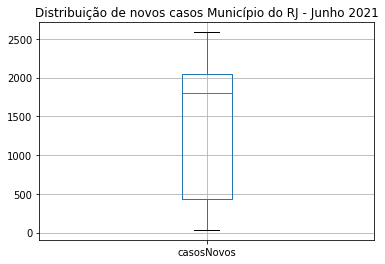

In [70]:
boxplot_mun_rj_junho_casos = mun_rj_junho_2021.boxplot(column=['casosNovos'], showfliers=False)
boxplot_mun_rj_junho_casos.plot()
plt.title("Distribuição de novos casos Município do RJ - Junho 2021")
plt.show()

*  <font color="red">**Média de Óbitos no Mês de Junho 2021** </font>



In [14]:
mun_rj_junho_2021_media_obitos =  mun_rj_junho_2021['obitosNovos'].mean()
mun_rj_junho_2021_media_obitos

77.2

* <font color="red"> **Desvio Padrão de Óbitos no Mês de Junho 2021**


In [15]:
mun_rj_junho_2021_desvio_obitos=  mun_rj_junho_2021['obitosNovos'].std()
mun_rj_junho_2021_desvio_obitos

48.73107059545594

 * <font color="red"> **Móda dos Óbitos no Mês de Junho 2021**



In [16]:
mun_rj_junho_2021_moda_obitos=  mun_rj_junho_2021['obitosNovos'].mode()
mun_rj_junho_2021_moda_obitos

0      0.0
1    106.0
2    124.0
3    137.0
dtype: float64

 * <font color="red"> **Análise de óbitos do Município do RJ no Mês de Junho 2021**

In [72]:
quartis_mun_rj_junho_obitos = mun_rj_junho_2021['obitosNovos'].quantile([0.25,0.5,0.75])
quartis_mun_rj_junho_obitos

0.25     29.25
0.50     93.00
0.75    111.50
Name: obitosNovos, dtype: float64

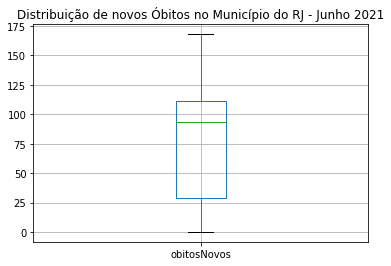

In [73]:
boxplot_mun_rj_junho_obtitos = mun_rj_junho_2021.boxplot(column=['obitosNovos'], showfliers=False)
boxplot_mun_rj_junho_obtitos .plot()
plt.title("Distribuição de novos Óbitos no Município do RJ - Junho 2021")
plt.show()

### Métricas do município do Rio de Janeiro  **em todo o período de 2020/2021**

* <font color="ffd11b">**Média de Casos no período de 2020/2021**



In [19]:
media_munic_rj_casos = geral_munic_rj['casosNovos'].mean()
media_munic_rj_casos

882.1235632183908

* <font color="ffd11b">**Desvio padrão de Casos no período de 2020/2021**

In [20]:
dp_munic_rj_casos = geral_munic_rj['casosNovos'].std()
dp_munic_rj_casos

935.6228113972337

* <font color="ffd11b">**Moda de Casos no período de 2020/2021**

In [21]:
moda_munic_rj_casos = geral_munic_rj['casosNovos'].mode()
moda_munic_rj_casos

0    212
dtype: int64

* <font color="ffd11b">**Análise  Casos no período de 2020/2021**

In [22]:
quartis_geral_munc_rj_casos = geral_munic_rj['casosNovos'].quantile([0.25,0.5,0.75,1])
quartis_geral_munc_rj_casos

0.25     232.0
0.50     649.5
0.75    1224.5
1.00    7592.0
Name: casosNovos, dtype: float64

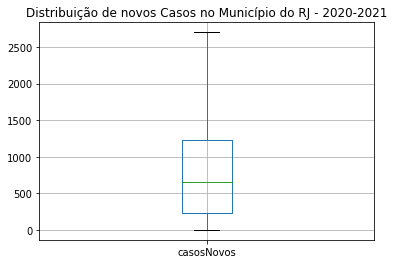

In [74]:
boxplot_mun_geral_munc_rj_casos = geral_munic_rj.boxplot(column=['casosNovos'], showfliers=False)
boxplot_mun_geral_munc_rj_casos.plot()
plt.title("Distribuição de novos Casos no Município do RJ - 2020-2021")
plt.show()

* <font color="red">**Média de Óbitos no período de 2020/2021**

In [24]:
media_munic_rj_obitos = geral_munic_rj['obitosNovos'].mean()
media_munic_rj_obitos

60.30172413793103

* <font color="red">**Desvio padrão de Óbitos no período de 2020/2021**

In [25]:
dp_munic_rj_obitos = geral_munic_rj['obitosNovos'].std()
dp_munic_rj_obitos

49.2851878118851

* <font color="red">**Moda de Óbitos no período de 2020/2021**


In [26]:
moda_munic_rj_obitos = geral_munic_rj['obitosNovos'].mode()
moda_munic_rj_obitos

0    0.0
dtype: float64

* <font color="red">** **Análise** gráfico de Óbitos no período de 2020/2021**

In [27]:
quartis_geral_munc_rj_obitos = geral_munic_rj['obitosNovos'].quantile([0.25,0.5,0.75,1])
quartis_geral_munc_rj_obitos

0.25     15.75
0.50     53.00
0.75     96.00
1.00    246.00
Name: obitosNovos, dtype: float64

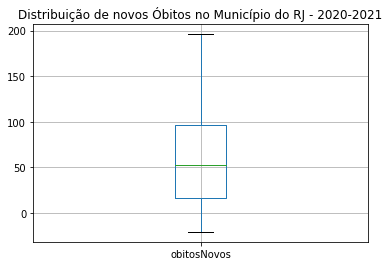

In [75]:
boxplot_mun_geral_munc_rj_obitos = geral_munic_rj.boxplot(column=['obitosNovos'], showfliers=False)
boxplot_mun_geral_munc_rj_obitos.plot()
plt.title("Distribuição de novos Óbitos no Município do RJ - 2020-2021")
plt.show()

# Análise de dados do Estado do RJ

In [29]:
geral_estado_rj = data_geral[(data_geral['estado'] =='RJ') & (data_geral['codmun'].isna())]

geral_estado_rj.sort_values(by='data')
geral_estado_rj

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
2908,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-01,31.0,17264943.0,167213.0,1718,13556,79.0,NaN,NaN,NaN
2909,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-02,32.0,17264943.0,167225.0,12,13572,16.0,NaN,NaN,NaN
2910,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-03,32.0,17264943.0,168064.0,839,13604,32.0,NaN,NaN,NaN
2911,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-04,32.0,17264943.0,168911.0,847,13715,111.0,NaN,NaN,NaN
2912,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-05,32.0,17264943.0,172679.0,3768,13855,140.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2021-07-10,27.0,17264943.0,981088.0,3318,56755,196.0,NaN,NaN,NaN
276,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2021-07-11,28.0,17264943.0,981839.0,751,56808,53.0,NaN,NaN,NaN
277,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2021-07-12,28.0,17264943.0,982609.0,770,56848,40.0,NaN,NaN,NaN
278,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2021-07-13,28.0,17264943.0,984554.0,1945,56947,99.0,NaN,NaN,NaN


In [30]:
geral_estado_rj['data'] = pd.to_datetime(geral_estado_rj['data'])

### Métricas do Estado do Rio de Janeiro  **Junho 2021**

In [31]:
estado_rj_junho = geral_estado_rj[(geral_estado_rj['data'] >= '2021-06-01' ) & (geral_estado_rj['data'] <= '2021-06-30' )] 


* <font color="ffd11b">**Média de Casos no estado em junho 2021**


In [32]:
media_estado_rj_junho_casos = estado_rj_junho['casosNovos'].mean()
media_estado_rj_junho_casos

3094.5333333333333

* <font color="ffd11b">**Desvio padrão de Casos no estado em junho 2021**




In [33]:
desvio_estado_rj_junho_obitos = estado_rj_junho['casosNovos'].std()
desvio_estado_rj_junho_obitos

1755.471284266723

* <font color="ffd11b">**Moda de Casos no estado em junho 2021**


In [34]:
moda_rj_junho_casos = estado_rj_junho['casosNovos'].mode()
moda_rj_junho_casos 

0      344
1      386
2      483
3      592
4      775
5      883
6     1190
7     1520
8     1681
9     2113
10    2326
11    2498
12    3093
13    3431
14    3520
15    3530
16    3566
17    3939
18    3954
19    4072
20    4178
21    4187
22    4341
23    4372
24    4422
25    4701
26    5022
27    5258
28    6092
29    6367
dtype: int64

* <font color="ffd11b">**Análise de  Casos no estado em junho 2021**


In [35]:
quartis_estado_rj_junho_casos = estado_rj_junho['casosNovos'].quantile([0.25,0.5,0.75])
quartis_estado_rj_junho_casos 

0.25    1560.25
0.50    3525.00
0.75    4302.50
Name: casosNovos, dtype: float64

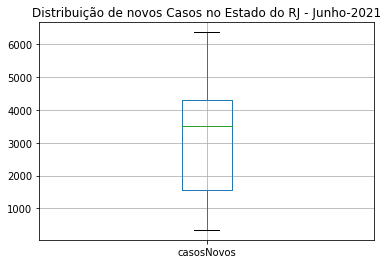

In [80]:
boxplot_mun_estado_rj_junho_casos = estado_rj_junho.boxplot(column=['casosNovos'], showfliers=False)
boxplot_mun_estado_rj_junho_casos .plot()
plt.title("Distribuição de novos Casos no Estado do RJ - Junho-2021")
plt.show()

* <font color="red">**Média de Óbitos no estado em junho 2021**


In [37]:
media_estado_rj_junho_obitos = estado_rj_junho['obitosNovos'].mean()
media_estado_rj_junho_obitos

162.86666666666667

* <font color="red">**Desvio padrão de Casos no estado em junho 2021**


In [38]:
desvio_estado_rj_junho_obitos = estado_rj_junho['obitosNovos'].std()
desvio_estado_rj_junho_obitos

96.19188199073527

* <font color="red">**Moda de Óbitos no estado em junho 2021**


In [39]:
moda_rj_junho_obitos = estado_rj_junho['obitosNovos'].mode()
moda_rj_junho_obitos

0     17.0
1    256.0
dtype: float64

* <font color="red">**Análise de Óbitos no estado em junho 2021**

In [40]:
quartis_estado_rj_junho_obitos = estado_rj_junho['obitosNovos'].quantile([0.25,0.5,0.75])
quartis_estado_rj_junho_obitos

0.25     91.50
0.50    179.00
0.75    232.75
Name: obitosNovos, dtype: float64

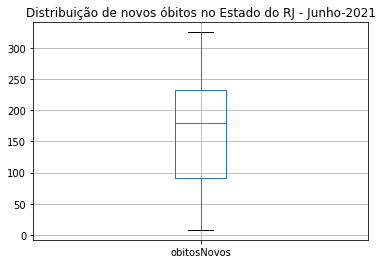

In [79]:
boxplot_mun_estado_rj_junho_obitos = estado_rj_junho.boxplot(column=['obitosNovos'], showfliers=False)
boxplot_mun_estado_rj_junho_obitos.plot()
plt.title("Distribuição de novos óbitos no Estado do RJ - Junho-2021")
plt.show()

### Métricas do Estado RJ  **em todo o período de 2020/2021**


* <font color="ffd11b">**Média de Casos no estado  2020/2021**





In [42]:
media_estado_rj_casos =  geral_estado_rj['casosNovos'].mean()
media_estado_rj_casos

2358.442528735632

* <font color="ffd11b">**Desvio padrão de Casos no estado  2020/2021**


In [43]:
desvios_estado_rj_casos =  geral_estado_rj['casosNovos'].std()
desvios_estado_rj_casos

1693.7520325290184

* <font color="ffd11b">** padrão de Casos no estado  2020/2021**

In [44]:
moda_estado_rj_casos =  geral_estado_rj['casosNovos'].mode()
moda_estado_rj_casos

0       0
1     234
2     268
3     751
4    1081
5    1180
6    2158
7    4039
8    4160
9    5118
dtype: int64

* <font color="ffd11b">**Análise de Casos no estado  2020/2021**

In [45]:
quartis_estado_rj_casos = geral_estado_rj['casosNovos'].quantile([0.25,0.5,0.75])
quartis_estado_rj_casos

0.25     874.75
0.50    2113.50
0.75    3561.50
Name: casosNovos, dtype: float64

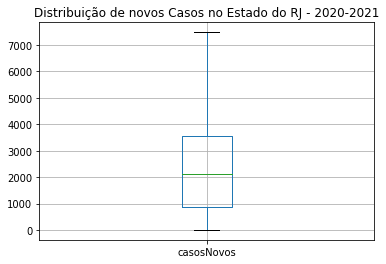

In [81]:
boxplot_estado_rj_casos = geral_estado_rj.boxplot(column=['casosNovos'], showfliers=False)
boxplot_estado_rj_casos.plot()
plt.title("Distribuição de novos Casos no Estado do RJ - 2020-2021")
plt.show()

* <font color="red">**Média de óbitos no estado  2020/2021**


In [47]:
media_estado_rj_obitos =  geral_estado_rj['obitosNovos'].mean()
media_estado_rj_obitos

125.2816091954023

* <font color="red">**Desfio padrão de óbitos no estado  2020/2021**


In [48]:
desvios_estado_rj_obitos =  geral_estado_rj['obitosNovos'].std()
desvios_estado_rj_obitos

98.25691786659208

* <font color="red">**Moda de óbitos no estado  2020/2021**


In [49]:
moda_estado_rj_obitos =  geral_estado_rj['obitosNovos'].mode()
moda_estado_rj_obitos

0    24.0
dtype: float64

* <font color="red">**Análise óbitos no estado  2020/2021**


In [50]:
quartis_estado_rj_obitos = geral_estado_rj['obitosNovos'].quantile([0.25,0.5,0.75])
quartis_estado_rj_obitos

0.25     42.75
0.50    106.50
0.75    185.25
Name: obitosNovos, dtype: float64

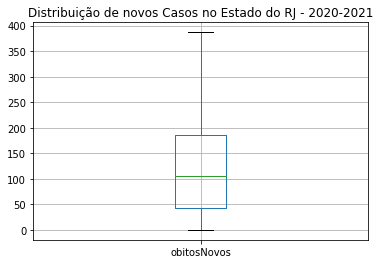

In [82]:
boxplot_estado_rj_obitos = geral_estado_rj.boxplot(column=['obitosNovos'], showfliers=False)
boxplot_estado_rj_obitos.plot()
plt.title("Distribuição de novos Casos no Estado do RJ - 2020-2021")
plt.show()

# Análise comparativa: Município RJ vs Estado RJ

### <font color="ffd11b">***Comparativo da média de casos do Município RJ X Estado RJ***

In [52]:
metricas_munc_rj_casos = [mun_rj_junho_2021_media_casos, media_munic_rj_casos]
metricas_estado_rj_casos = [media_estado_rj_junho_casos, media_estado_rj_casos]

In [53]:
casos = pd.DataFrame({"MunRJ":metricas_munc_rj_casos ,"EsRJ": metricas_estado_rj_casos}, index = ['junho_2021', 'total_20/21'])
casos

,MunRJ,EsRJ
junho_2021,1434.466667,3094.533333
total_20/21,882.123563,2358.442529


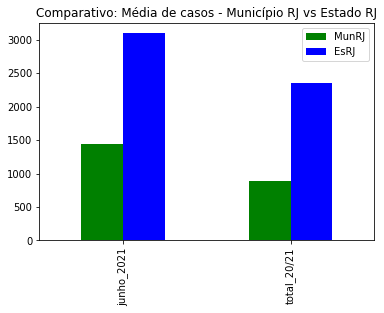

In [54]:
casos.plot.bar(color=["Green","blue"])
plt.title('Comparativo: Média de casos - Município RJ vs Estado RJ')
plt.show()

In [55]:
geral_estado_rj

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
2908,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-01,31.0,17264943.0,167213.0,1718,13556,79.0,NaN,NaN,NaN
2909,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-02,32.0,17264943.0,167225.0,12,13572,16.0,NaN,NaN,NaN
2910,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-03,32.0,17264943.0,168064.0,839,13604,32.0,NaN,NaN,NaN
2911,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-04,32.0,17264943.0,168911.0,847,13715,111.0,NaN,NaN,NaN
2912,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-05,32.0,17264943.0,172679.0,3768,13855,140.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2021-07-10,27.0,17264943.0,981088.0,3318,56755,196.0,NaN,NaN,NaN
276,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2021-07-11,28.0,17264943.0,981839.0,751,56808,53.0,NaN,NaN,NaN
277,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2021-07-12,28.0,17264943.0,982609.0,770,56848,40.0,NaN,NaN,NaN
278,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2021-07-13,28.0,17264943.0,984554.0,1945,56947,99.0,NaN,NaN,NaN


In [56]:
casos2 = pd.DataFrame({"MunRJ":geral_munic_rj['casosNovos']  ,"EsRJ": geral_estado_rj['casosNovos'] })
geral_estado_rj

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
2908,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-01,31.0,17264943.0,167213.0,1718,13556,79.0,NaN,NaN,NaN
2909,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-02,32.0,17264943.0,167225.0,12,13572,16.0,NaN,NaN,NaN
2910,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-03,32.0,17264943.0,168064.0,839,13604,32.0,NaN,NaN,NaN
2911,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-04,32.0,17264943.0,168911.0,847,13715,111.0,NaN,NaN,NaN
2912,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2020-08-05,32.0,17264943.0,172679.0,3768,13855,140.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2021-07-10,27.0,17264943.0,981088.0,3318,56755,196.0,NaN,NaN,NaN
276,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2021-07-11,28.0,17264943.0,981839.0,751,56808,53.0,NaN,NaN,NaN
277,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2021-07-12,28.0,17264943.0,982609.0,770,56848,40.0,NaN,NaN,NaN
278,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2021-07-13,28.0,17264943.0,984554.0,1945,56947,99.0,NaN,NaN,NaN


### <font color="red">***Comparativo da média de Óbitos do Munícipio RJ X Estado RJ***



In [57]:
metricas_munc_rj_obitos = [mun_rj_junho_2021_media_obitos, media_munic_rj_obitos]
metricas_estado_rj_obitos = [media_estado_rj_junho_obitos, media_estado_rj_obitos]
obitos = pd.DataFrame({"MunRJ":metricas_munc_rj_obitos ,"EsRJ": metricas_estado_rj_obitos}, index = ['junho_2021', 'total_20/21'])
obitos

,MunRJ,EsRJ
junho_2021,77.200000,162.866667
total_20/21,60.301724,125.281609


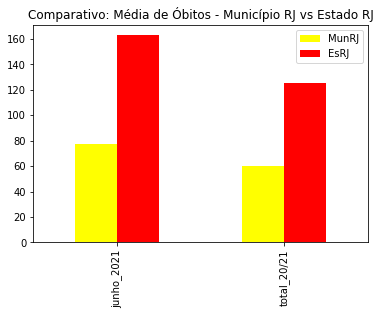

In [58]:
obitos.plot.bar(color=["yellow","red"])
plt.title('Comparativo: Média de Óbitos - Município RJ vs Estado RJ')
plt.show()

# Outras Métricas do Estado

### Total de Casos e Óbitos no Estado do Rio de Janeiro

In [59]:
acumulado_rj = geral_estado_rj.loc[geral_estado_rj['data'] == '2021-07-14']
acumulado_rj

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
279,Sudeste,RJ,NaN,33.0,NaN,NaN,NaN,2021-07-14,28.0,17264943.0,986233.0,1679,57075,128.0,NaN,NaN,NaN


In [60]:
tudo_rj = data_geral[(data_geral.estado =='RJ')  & (data_geral['data'] == '2021-07-14')]

### Métricas das Macros Regiões do Estado do Rio de Janeiro em toda pandemia 2020/2021

In [61]:
regioes_rj = tudo_rj.groupby(['nomeRegiaoSaude']).sum()
regioes_rj 

,coduf,codmun,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
nomeRegiaoSaude,,,,,,,,,,,
BAIA DA ILHA GRANDE,99.0,990650.0,84.0,291418.0,19706.0,4,706,4.0,0.0,0.0,0.0
BAIXADA LITORANEA,297.0,2971977.0,252.0,839958.0,54229.0,2,2489,2.0,0.0,0.0,0.0
CENTRO-SUL,363.0,3633742.0,308.0,340526.0,33232.0,2,1137,2.0,0.0,0.0,1.0
MEDIO PARAIBA,396.0,3964463.0,336.0,913698.0,87572.0,10,3046,10.0,0.0,0.0,0.0
METROPOLITANA I,396.0,3963781.0,336.0,10497016.0,485020.0,1573,36606,89.0,0.0,0.0,12.0
METROPOLITANA II,231.0,2312845.0,196.0,2116506.0,124797.0,79,6286,12.0,0.0,0.0,6.0
NOROESTE,462.0,4623763.0,392.0,348191.0,31016.0,1,827,1.0,0.0,0.0,0.0
NORTE,264.0,2642443.0,224.0,945425.0,67480.0,1,2630,1.0,0.0,0.0,0.0
SERRANA,528.0,5285075.0,448.0,972205.0,83181.0,7,3348,7.0,0.0,0.0,3.0


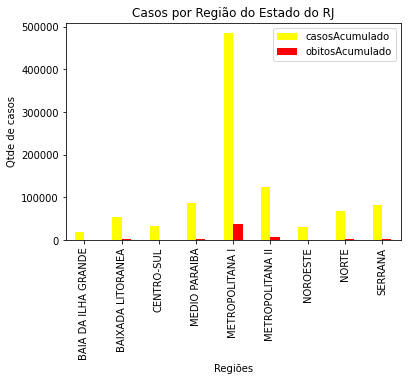

In [62]:
regioes_rj.plot.bar(y=['casosAcumulado', 'obitosAcumulado'], color=['yellow','red'])
plt.xlabel('Regiões')
plt.ylabel('Qtde de casos')
plt.title('Casos por Região do Estado do RJ')
plt.show()


### Métricas dos 10 municípios com mais Casos e Óbitos

In [63]:
total_caos_estado_10munc = tudo_rj
total_caos_estado_10munc = total_caos_estado_10munc[total_caos_estado_10munc['municipio'].notna()]
total_caos_estado_10munc.set_index('municipio', inplace=True)



In [64]:
casos  = total_caos_estado_10munc.sort_values(by='casosAcumulado', ascending=False).head(10)
casos.casosAcumulado

municipio
Rio de Janeiro           378301.0
São Gonçalo               51896.0
Niterói                   40966.0
Volta Redonda             33636.0
Campos dos Goytacazes     27797.0
Macaé                     26610.0
Teresópolis               24747.0
Duque de Caxias           22344.0
Nova Friburgo             20987.0
Belford Roxo              20716.0
Name: casosAcumulado, dtype: float64

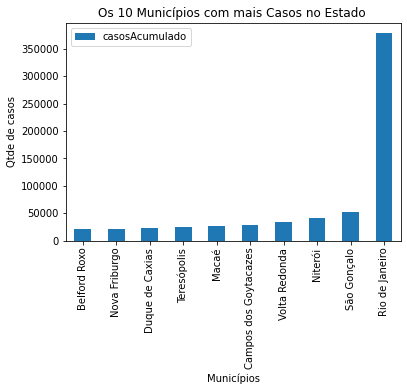

In [65]:
casos.sort_values(by=['casosAcumulado'],inplace=True)
casos.plot.bar(y='casosAcumulado')
plt.xlabel('Municípios')
plt.ylabel('Qtde de casos')
plt.title('Os 10 Municípios com mais Casos no Estado ')
plt.show()

### Os 10 Municípios com mais Óbitos

In [66]:
obitos_por_munic_top_10  = total_caos_estado_10munc.sort_values(by='obitosAcumulado', ascending=False).head(10)
obitos_por_munic_top_10.obitosAcumulado

municipio
Rio de Janeiro           29295
São Gonçalo               2764
Niterói                   1897
Nova Iguaçu               1742
Campos dos Goytacazes     1573
Duque de Caxias           1500
Petrópolis                1295
São João de Meriti        1088
Volta Redonda             1066
Teresópolis                790
Name: obitosAcumulado, dtype: int64

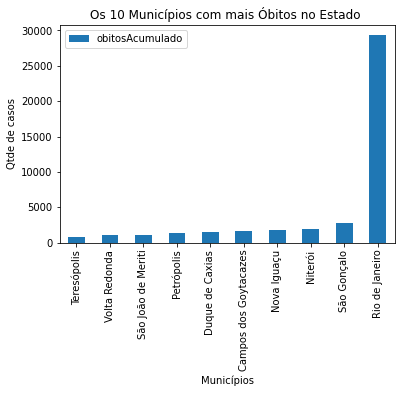

In [67]:
obitos_por_munic_top_10.sort_values(by=['obitosAcumulado'],inplace=True)
obitos_por_munic_top_10.plot.bar(y='obitosAcumulado')
plt.xlabel('Municípios')
plt.ylabel('Qtde de casos')
plt.title('Os 10 Municípios com mais Óbitos no Estado ')
plt.show()